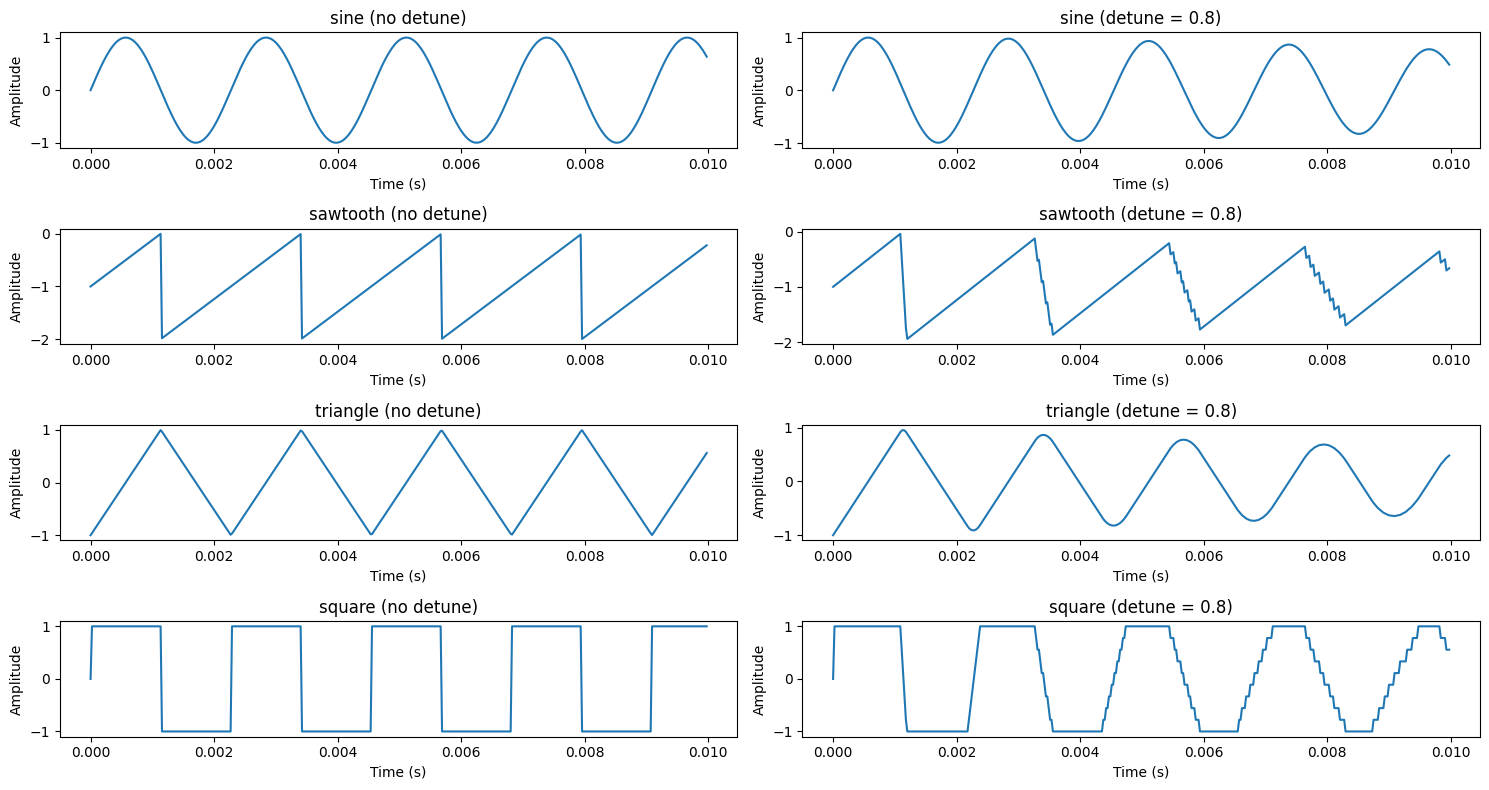

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Oscillator:
    def __init__(self, shape, frequency, phase, volume, detune):
        self.shape = shape
        self.frequency = frequency
        self.phase = phase
        self.volume = volume
        self.detune = detune

    def generate_waveform(self, duration, sample_rate):
        t = np.linspace(0, duration, int(duration * sample_rate), False)

        if self.shape == "sine":
            waveform = self.volume * np.sin(2 * np.pi * self.frequency * t + self.phase)
        elif self.shape == "sawtooth":
            waveform = self.volume * (2 * (t * self.frequency - np.floor(0.5 + t * self.frequency)) - 1)
        elif self.shape == "triangle":
            waveform = self.volume * (2 * np.abs(2 * (t * self.frequency - np.floor(0.5 + t * self.frequency))) - 1)
        elif self.shape == "square":
            waveform = self.volume * np.sign(np.sin(2 * np.pi * self.frequency * t + self.phase))
        else:
            raise ValueError("Invalid waveform shape")

        if self.detune != 0:
            num_detuned_waves = int(self.detune * 10) + 1
            detuned_waveforms = []
            for i in range(num_detuned_waves):
                frequency_offset = (i - num_detuned_waves // 2) * self.frequency * 0.01
                detuned_osc = Oscillator(self.shape, self.frequency + frequency_offset, self.phase, self.volume / num_detuned_waves, 0)
                detuned_waveform = detuned_osc.generate_waveform(duration, sample_rate)
                # Ensure waveform shape is consistent
                if isinstance(detuned_waveform, tuple): 
                    detuned_waveforms.append(detuned_waveform[1])  # Take the waveform part if it's a tuple
                else:
                    detuned_waveforms.append(detuned_waveform)

            waveform = np.sum(detuned_waveforms, axis=0) 

        return t, waveform

# Parameters
duration = 0.01  # 10 milliseconds
sample_rate = 44100
frequency = 440  # A4 note
phase = 0
volume = 1
detune = 0.8

# Generate and plot waveforms
shapes = ["sine", "sawtooth", "triangle", "square"]
fig, axs = plt.subplots(len(shapes), 2, figsize=(15, 8))

for i, shape in enumerate(shapes):
    # Normal waveform
    t, waveform = Oscillator(shape, frequency, phase, volume, 0).generate_waveform(duration, sample_rate)
    axs[i, 0].plot(t, waveform)
    axs[i, 0].set_title(f"{shape} (no detune)")
    axs[i, 0].set_xlabel("Time (s)")
    axs[i, 0].set_ylabel("Amplitude")

    # Detuned waveform
    t, waveform = Oscillator(shape, frequency, phase, volume, detune).generate_waveform(duration, sample_rate)
    axs[i, 1].plot(t, waveform)
    axs[i, 1].set_title(f"{shape} (detune = {detune})")
    axs[i, 1].set_xlabel("Time (s)")
    axs[i, 1].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()


The part of the code  defines an Oscillator class that can generate various types of audio waveforms such as sine, sawtooth, triangle, and square. The class allows for the adjustment of waveform properties including frequency, phase, volume, and detuning. The generate_waveform method creates the waveform data for a specified duration and sample rate. If detuning is applied, it generates multiple slightly detuned waveforms and sums them.

In the main part of the script, the code sets up parameters like duration, sample rate, frequency, phase, volume, and detune amount. It then iterates over different waveform shapes, generates both normal and detuned versions of these waveforms, and plots them using matplotlib. The resulting plots show the waveform shapes and illustrate the effect of detuning on these waveforms.



C:\Users\seyed\AppData\Local\Temp\ipykernel_24448\211851296.py:63: RuntimeWarning: divide by zero encountered in log
  return np.log(end_level / start_level) / time
C:\Users\seyed\AppData\Local\Temp\ipykernel_24448\211851296.py:91: RuntimeWarning: invalid value encountered in multiply
  envelope[-release_samples:] = np.exp(alpha_release * np.linspace(0, self.release, release_samples))
C:\Users\seyed\AppData\Local\Temp\ipykernel_24448\211851296.py:115: RuntimeWarning: invalid value encountered in cast
  waveform_16bit = np.int16(waveform * 32767)


Saved sine.wav
Saved sawtooth.wav
Saved triangle.wav
Saved square.wav
Playing sine.wav
Playing sawtooth.wav
Playing triangle.wav
Playing square.wav


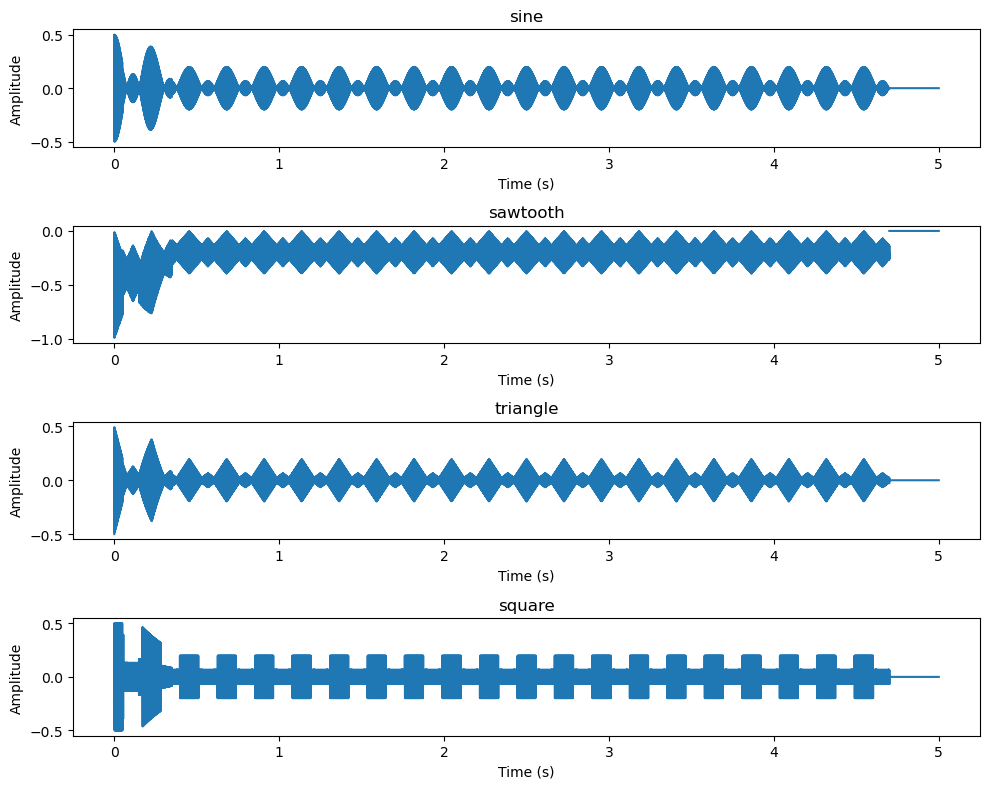

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile 
import soundfile as sf
class Oscillator:
    def __init__(self, shape, frequency, phase, volume, detune , envelope = None):
        self.shape = shape
        self.frequency = frequency
        self.phase = phase
        self.volume = volume
        self.detune = detune
        self.envelope = envelope

    def generate_waveform(self, duration, sample_rate):
        t = np.linspace(0, duration, int(duration * sample_rate), False)

        if self.shape == "sine":
            waveform = self.volume * np.sin(2 * np.pi * self.frequency * t + self.phase)
        elif self.shape == "sawtooth":
            waveform = self.volume * (2 * (t * self.frequency - np.floor(0.5 + t * self.frequency)) - 1)
        elif self.shape == "triangle":
            waveform = self.volume * (2 * np.abs(2 * (t * self.frequency - np.floor(0.5 + t * self.frequency))) - 1)
        elif self.shape == "square":
            waveform = self.volume * np.sign(np.sin(2 * np.pi * self.frequency * t + self.phase))
        else:
            raise ValueError("Invalid waveform shape")

        if self.detune != 0:
            num_detuned_waves = int(self.detune * 10) + 1
            detuned_waveforms = []
            for i in range(num_detuned_waves):
                frequency_offset = (i - num_detuned_waves // 2) * self.frequency * 0.01
                detuned_osc = Oscillator(self.shape, self.frequency + frequency_offset, self.phase, self.volume / num_detuned_waves, 0)
                detuned_waveform = detuned_osc.generate_waveform(duration, sample_rate)
                # Ensure waveform shape is consistent
                if isinstance(detuned_waveform, tuple): 
                    detuned_waveforms.append(detuned_waveform[1])  # Take the waveform part if it's a tuple
                else:
                    detuned_waveforms.append(detuned_waveform)

            waveform = np.sum(detuned_waveforms, axis=0) 
        if self.envelope:
            envelope = self.envelope.generate_envelope(duration)
            waveform *= envelope  # Apply envelope to the waveform

        return t, waveform

class Envelope:
    def __init__(self, attack, hold, decay, sustain, release, sample_rate, velocity=127):
        self.attack = attack / 1000
        self.hold = hold / 1000
        self.decay = decay / 1000
        self.sustain = sustain / 127
        self.release = release / 1000
        self.sample_rate = sample_rate
        self.velocity = velocity / 127

    def _calculate_alpha(self, time, start_level, end_level):
        if time == 0 or start_level == 0:
            return 0;
        else :
            return np.log(end_level / start_level) / time

    def generate_envelope(self, duration):
        attack_samples = int(self.attack * self.sample_rate)
        hold_samples = int(self.hold * self.sample_rate)
        decay_samples = int(self.decay * self.sample_rate)
        release_samples = int(self.release * self.sample_rate)

        envelope = np.zeros(int(duration * self.sample_rate))

        # Attack
        alpha_attack = self._calculate_alpha(self.attack, 0, self.velocity)
        envelope[:attack_samples] = np.exp(alpha_attack * np.linspace(0, self.attack, attack_samples))

        # Hold
        envelope[attack_samples:attack_samples + hold_samples] = self.velocity

        # Decay
        alpha_decay = self._calculate_alpha(self.decay, self.velocity, self.sustain * self.velocity)
        envelope[attack_samples + hold_samples:attack_samples + hold_samples + decay_samples] = np.exp(alpha_decay * np.linspace(0, self.decay, decay_samples))

        # Sustain (optional)
        if self.sustain > 0:
            envelope[attack_samples + hold_samples + decay_samples:-release_samples] = self.sustain * self.velocity

        # Release
        if self.sustain > 0:  # Release from sustain level
            alpha_release = self._calculate_alpha(self.release, self.sustain * self.velocity, 0)
            envelope[-release_samples:] = np.exp(alpha_release * np.linspace(0, self.release, release_samples))
        else:  # Immediate release (no sustain)
            envelope[-release_samples:] = np.linspace(self.velocity, 0, release_samples)  # Linear release

        return envelope
   # Parameters
duration = 5.0
sample_rate = 44100
frequency = 440
phase = 0
volume = 0.5
detune = 0.2

# Generate and save waveforms
shapes = ["sine", "sawtooth", "triangle", "square"]
all_waveforms = []  # List to store all waveforms

for shape in shapes:
    envelope = Envelope(50, 100, 200, 64, 300, sample_rate, velocity=100)
    osc = Oscillator(shape, frequency, phase, volume, detune, envelope)
    t, waveform = osc.generate_waveform(duration, sample_rate)
    all_waveforms.append(waveform)  # Store waveform for later plotting

    # Normalize and save
    waveform_16bit = np.int16(waveform * 32767)
    filename = f"{shape}.wav"
    wavfile.write(filename, sample_rate, waveform_16bit)
    print(f"Saved {filename}")

# Play each waveform (optional)
for shape, waveform in zip(shapes, all_waveforms):
    print(f"Playing {shape}.wav")
    sd.play(waveform, sample_rate)
    sd.wait()

# Plot waveforms
fig, axs = plt.subplots(len(shapes), figsize=(10, 8))
for i, (shape, waveform) in enumerate(zip(shapes, all_waveforms)):  # Now iterating over all_waveforms
    axs[i].plot(t, waveform)
    axs[i].set_title(shape)
    axs[i].set_xlabel("Time (s)")
    axs[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

The part of the code  is a sound synthesis program that generates, saves, plays, and plots various waveforms (sine, sawtooth, triangle, square) using oscillators with envelope shaping. It defines classes for oscillators and envelopes, sets parameters for waveform generation, and iterates over different waveform shapes. For each shape, it creates an envelope, generates the waveform, saves it as a .wav file, plays the sound, and plots the waveform.

Oscillator Class: This class generates waveforms with different shapes (sine, sawtooth, triangle, square) using parameters such as frequency, phase, volume, detuning, and an optional envelope.
Envelope Class: This class creates an envelope with attack, hold, decay, sustain, and release phases to shape the amplitude of the waveform over time.


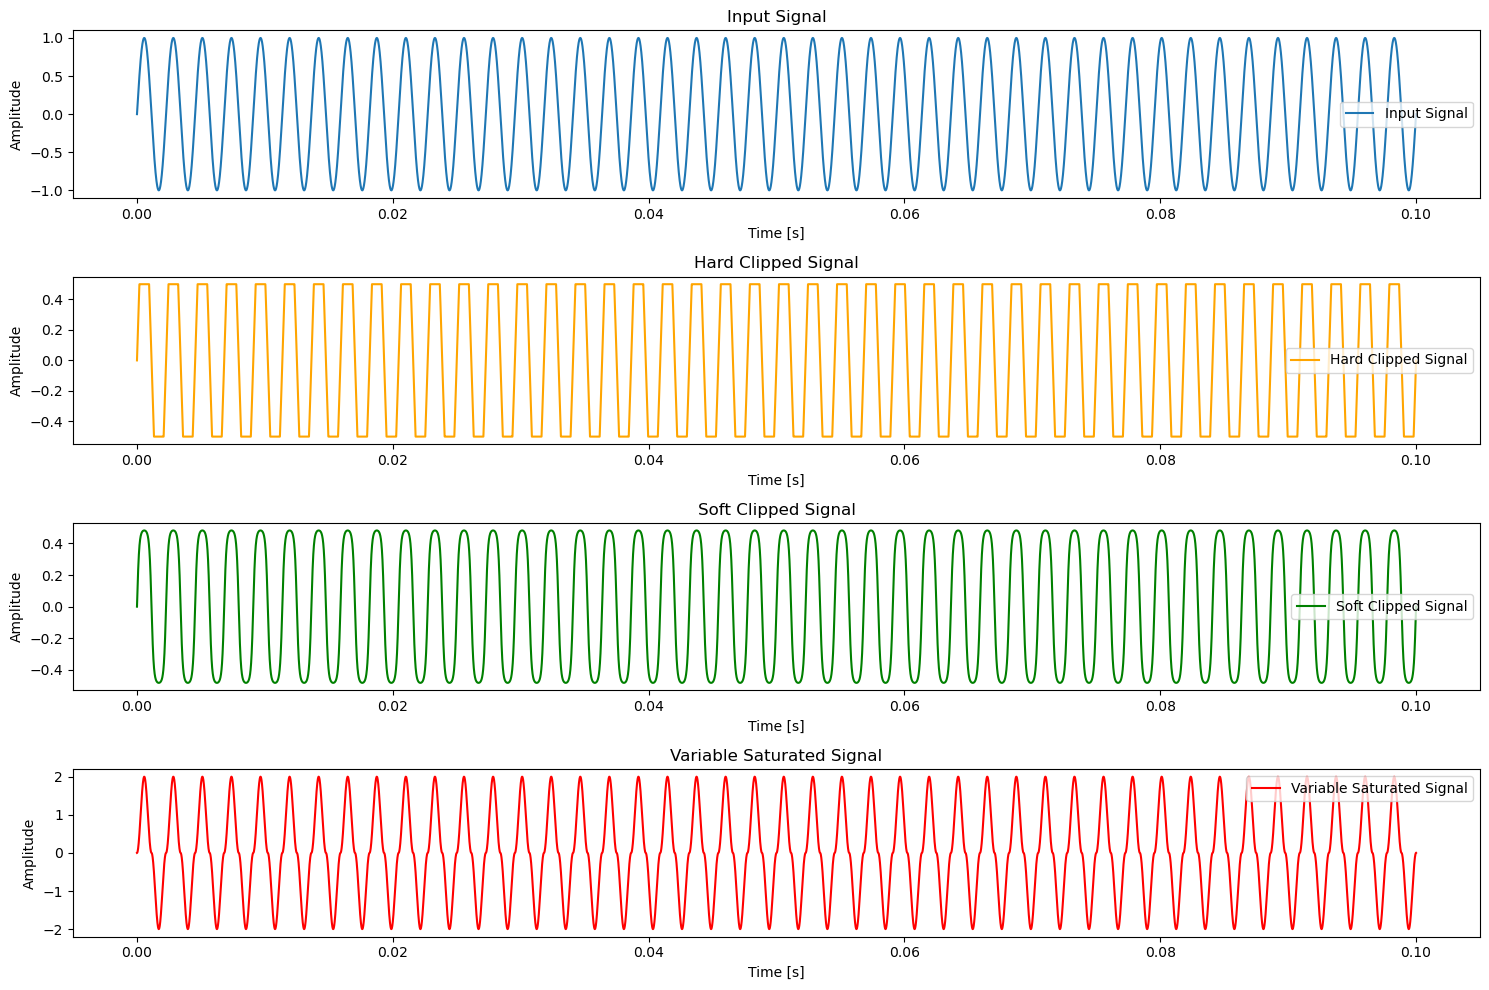

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def saturate_signal(x, effect_type, T, a=1, Bias=0, Drive=1):
    x = Bias + x * Drive
    if effect_type == 'hard':
        x_saturated = np.clip(x, -T, T)
    elif effect_type == 'soft':
        x_saturated = T * np.tanh(x / T)
    elif effect_type == 'variable':
        x_saturated = T * (np.abs(x / T)**a) * np.sign(x)
    else:
        raise ValueError("Invalid effect type. Choose from 'hard', 'soft', or 'variable'.")
    
    return x_saturated

fs = 44100  
t = np.linspace(0, 0.1, fs)

input_signal = np.sin(2 * np.pi * 440 * t)  

hard_clipped_signal = saturate_signal(input_signal, effect_type='hard', T=0.5)
soft_clipped_signal = saturate_signal(input_signal, effect_type='soft', T=0.5)
variable_saturated_signal = saturate_signal(input_signal, effect_type='variable', T=0.5, a=2)

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, hard_clipped_signal, label="Hard Clipped Signal", color='orange')
plt.title("Hard Clipped Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(t, soft_clipped_signal, label="Soft Clipped Signal", color='green')
plt.title("Soft Clipped Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, variable_saturated_signal, label="Variable Saturated Signal", color='red')
plt.title("Variable Saturated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code  demonstrates applying different types of saturation effects (hard clipping, soft clipping, and variable saturation) to an audio signal. It generates a sine wave as the input signal, applies each saturation effect, and plots the original and processed signals for visual comparison.

saturate_signal(x, effect_type, T, a=1, Bias=0, Drive=1): This function applies different saturation effects to an input signal x based on the specified effect_type ('hard', 'soft', or 'variable') and parameters (T, a, Bias, Drive).

Apply hard clipping, soft clipping, and variable saturation to the input signal using the saturate_signal function.


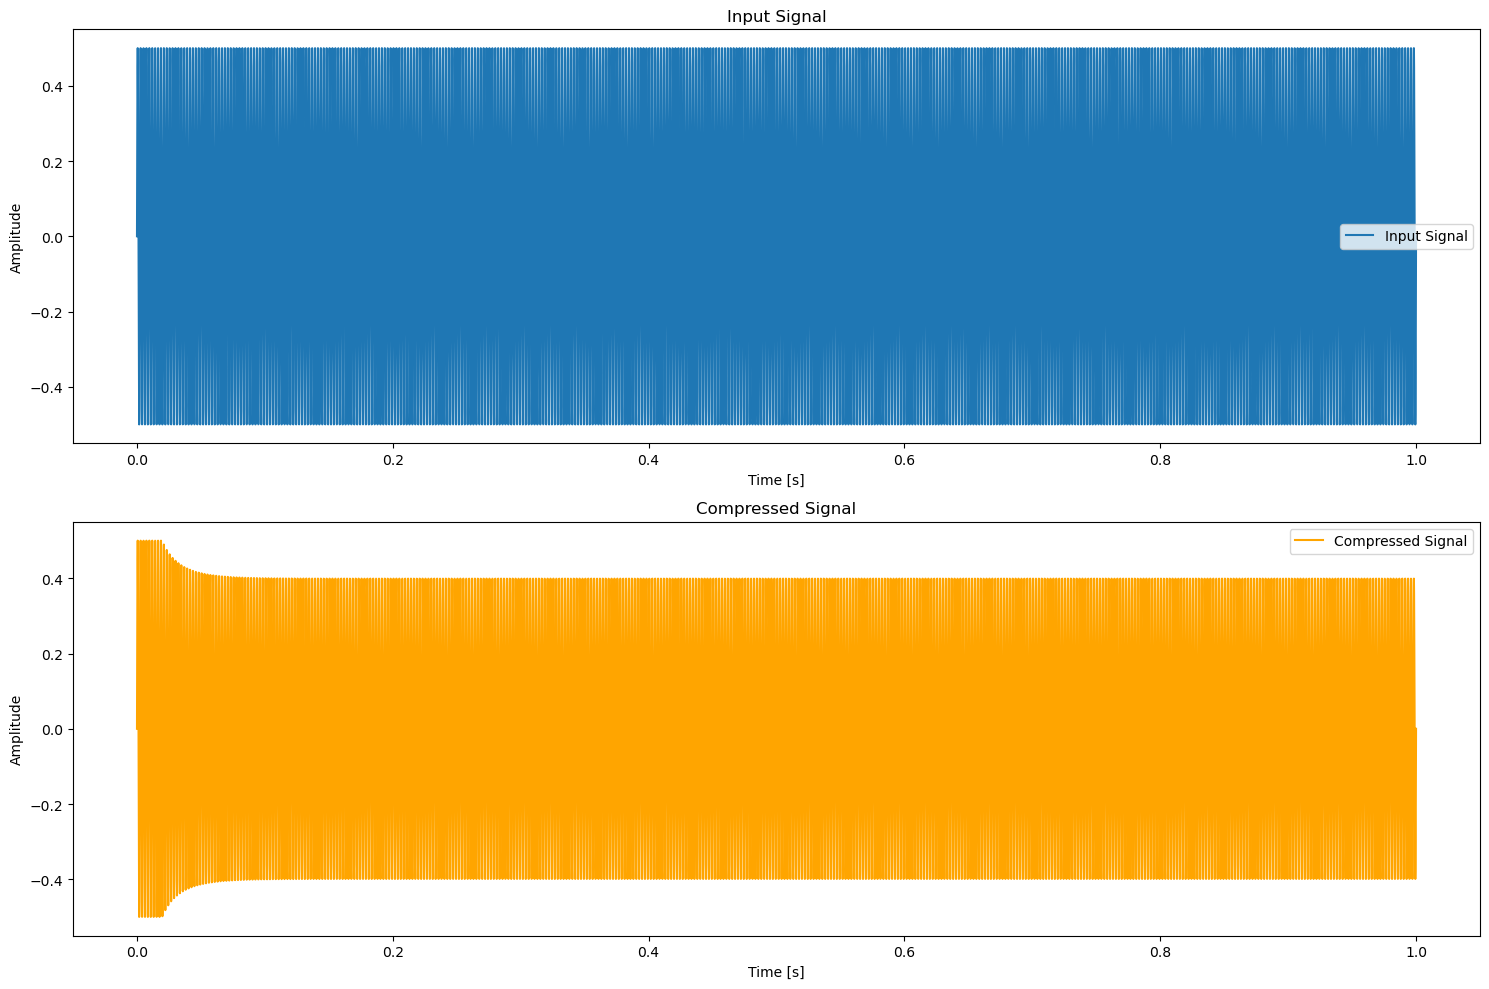

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def compressor(x, threshold, ratio, attack, release, fs):
    attack_samples = int(attack * fs / 1000)
    release_samples = int(release * fs / 1000)
    gain = np.ones_like(x)
    env = np.zeros_like(x)
    
    for i in range(1, len(x)):
        abs_sample = np.abs(x[i])
        
        if abs_sample > env[i-1]:
            env[i] = (1 - 1/attack_samples) * env[i-1] + (1/attack_samples) * abs_sample
        else:
            env[i] = (1 - 1/release_samples) * env[i-1] + (1/release_samples) * abs_sample
        
        if env[i] > threshold:
            gain_reduction = 1 - (1 - 1/ratio) * (env[i] - threshold) / env[i]
        else:
            gain_reduction = 1
        
        gain[i] = gain_reduction
    
    compressed_signal = x * gain
    return compressed_signal

fs = 44100  
t = np.linspace(0, 1, fs)
input_signal = 0.5 * np.sin(2 * np.pi * 440 * t) 

threshold = 0.3  
ratio = 4  
attack = 10  
release = 50  

compressed_signal = compressor(input_signal, threshold, ratio, attack, release, fs)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, compressed_signal, label="Compressed Signal", color='orange')
plt.title("Compressed Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code  applies dynamic range compression to an audio signal. It generates a sine wave, compresses it using specified parameters (threshold, ratio, attack, release), and plots both the original and compressed signals for comparison.

compressor(x, threshold, ratio, attack, release, fs): This function compresses the dynamic range of the input signal x using the specified threshold, ratio, attack, and release parameters. The function calculates the gain reduction based on the envelope of the signal and applies it to compress the signal.


Use the compressor function to apply compression to the input signal.

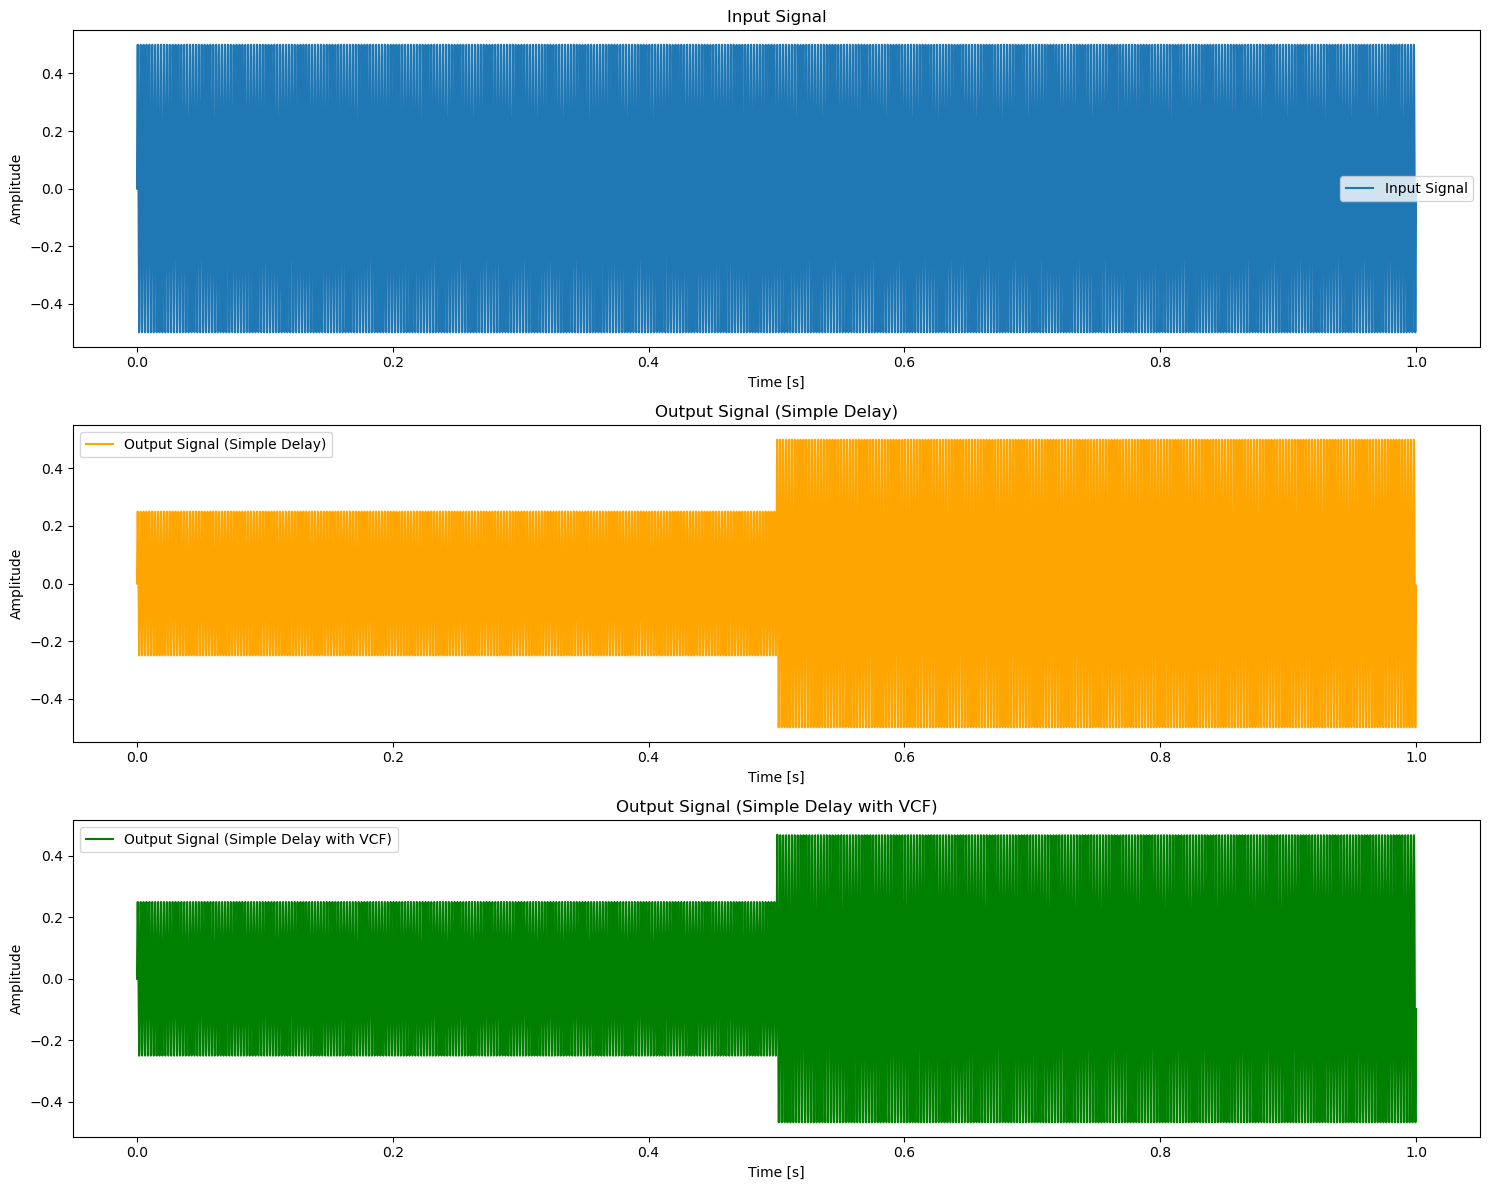

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def simple_delay(input_signal, delay_samples, dry_wet, fs):
    delayed_signal = np.concatenate((np.zeros(delay_samples), input_signal[:-delay_samples]))
    output_signal = (1 - dry_wet) * input_signal + dry_wet * delayed_signal
    return output_signal

def low_pass_filter(input_signal, cutoff_freq, fs):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(1, normal_cutoff, btype='low', analog=False)
    filtered_signal = lfilter(b, a, input_signal)
    return filtered_signal

def simple_delay_with_vcf(input_signal, delay_samples, dry_wet, fs, cutoff_freq):
    delayed_signal = np.concatenate((np.zeros(delay_samples), input_signal[:-delay_samples]))
    delayed_signal = low_pass_filter(delayed_signal, cutoff_freq, fs)
    output_signal = (1 - dry_wet) * input_signal + dry_wet * delayed_signal
    return output_signal

# Parameters
fs = 44100  
t = np.linspace(0, 1, fs)
input_signal = 0.5 * np.sin(2 * np.pi * 440 * t)  

delay_ms = 500  
dry_wet = 0.5  
delay_samples = int(delay_ms * fs / 1000) 
cutoff_freq = 1000 

output_signal = simple_delay(input_signal, delay_samples, dry_wet, fs)

output_signal_with_vcf = simple_delay_with_vcf(input_signal, delay_samples, dry_wet, fs, cutoff_freq)

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, output_signal, label="Output Signal (Simple Delay)", color='orange')
plt.title("Output Signal (Simple Delay)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, output_signal_with_vcf, label="Output Signal (Simple Delay with VCF)", color='green')
plt.title("Output Signal (Simple Delay with VCF)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code applies a simple delay effect and a delay effect with a low-pass filter to an audio signal. It generates a sine wave, applies the effects, and plots the original signal, the signal with a simple delay, and the signal with a delay and low-pass filter for visual comparison.

simple_delay: Applies a basic delay effect to the input signal.
low_pass_filter: Applies a low-pass filter to the input signal.
simple_delay_with_vcf: Applies a delay effect followed by a low-pass filter to the delayed signal.


Apply the simple delay effect.
Apply the delay effect with the low-pass filter.


Band 1/12: 20.00 Hz to 35.57 Hz
Band 2/12: 35.57 Hz to 63.25 Hz
Band 3/12: 63.25 Hz to 112.47 Hz
Band 4/12: 112.47 Hz to 200.00 Hz
Band 5/12: 200.00 Hz to 355.66 Hz
Band 6/12: 355.66 Hz to 632.46 Hz
Band 7/12: 632.46 Hz to 1124.68 Hz
Band 8/12: 1124.68 Hz to 2000.00 Hz
Band 9/12: 2000.00 Hz to 3556.56 Hz
Band 10/12: 3556.56 Hz to 6324.56 Hz
Band 11/12: 6324.56 Hz to 11246.83 Hz
Band 12/12: 11246.83 Hz to 20000.00 Hz


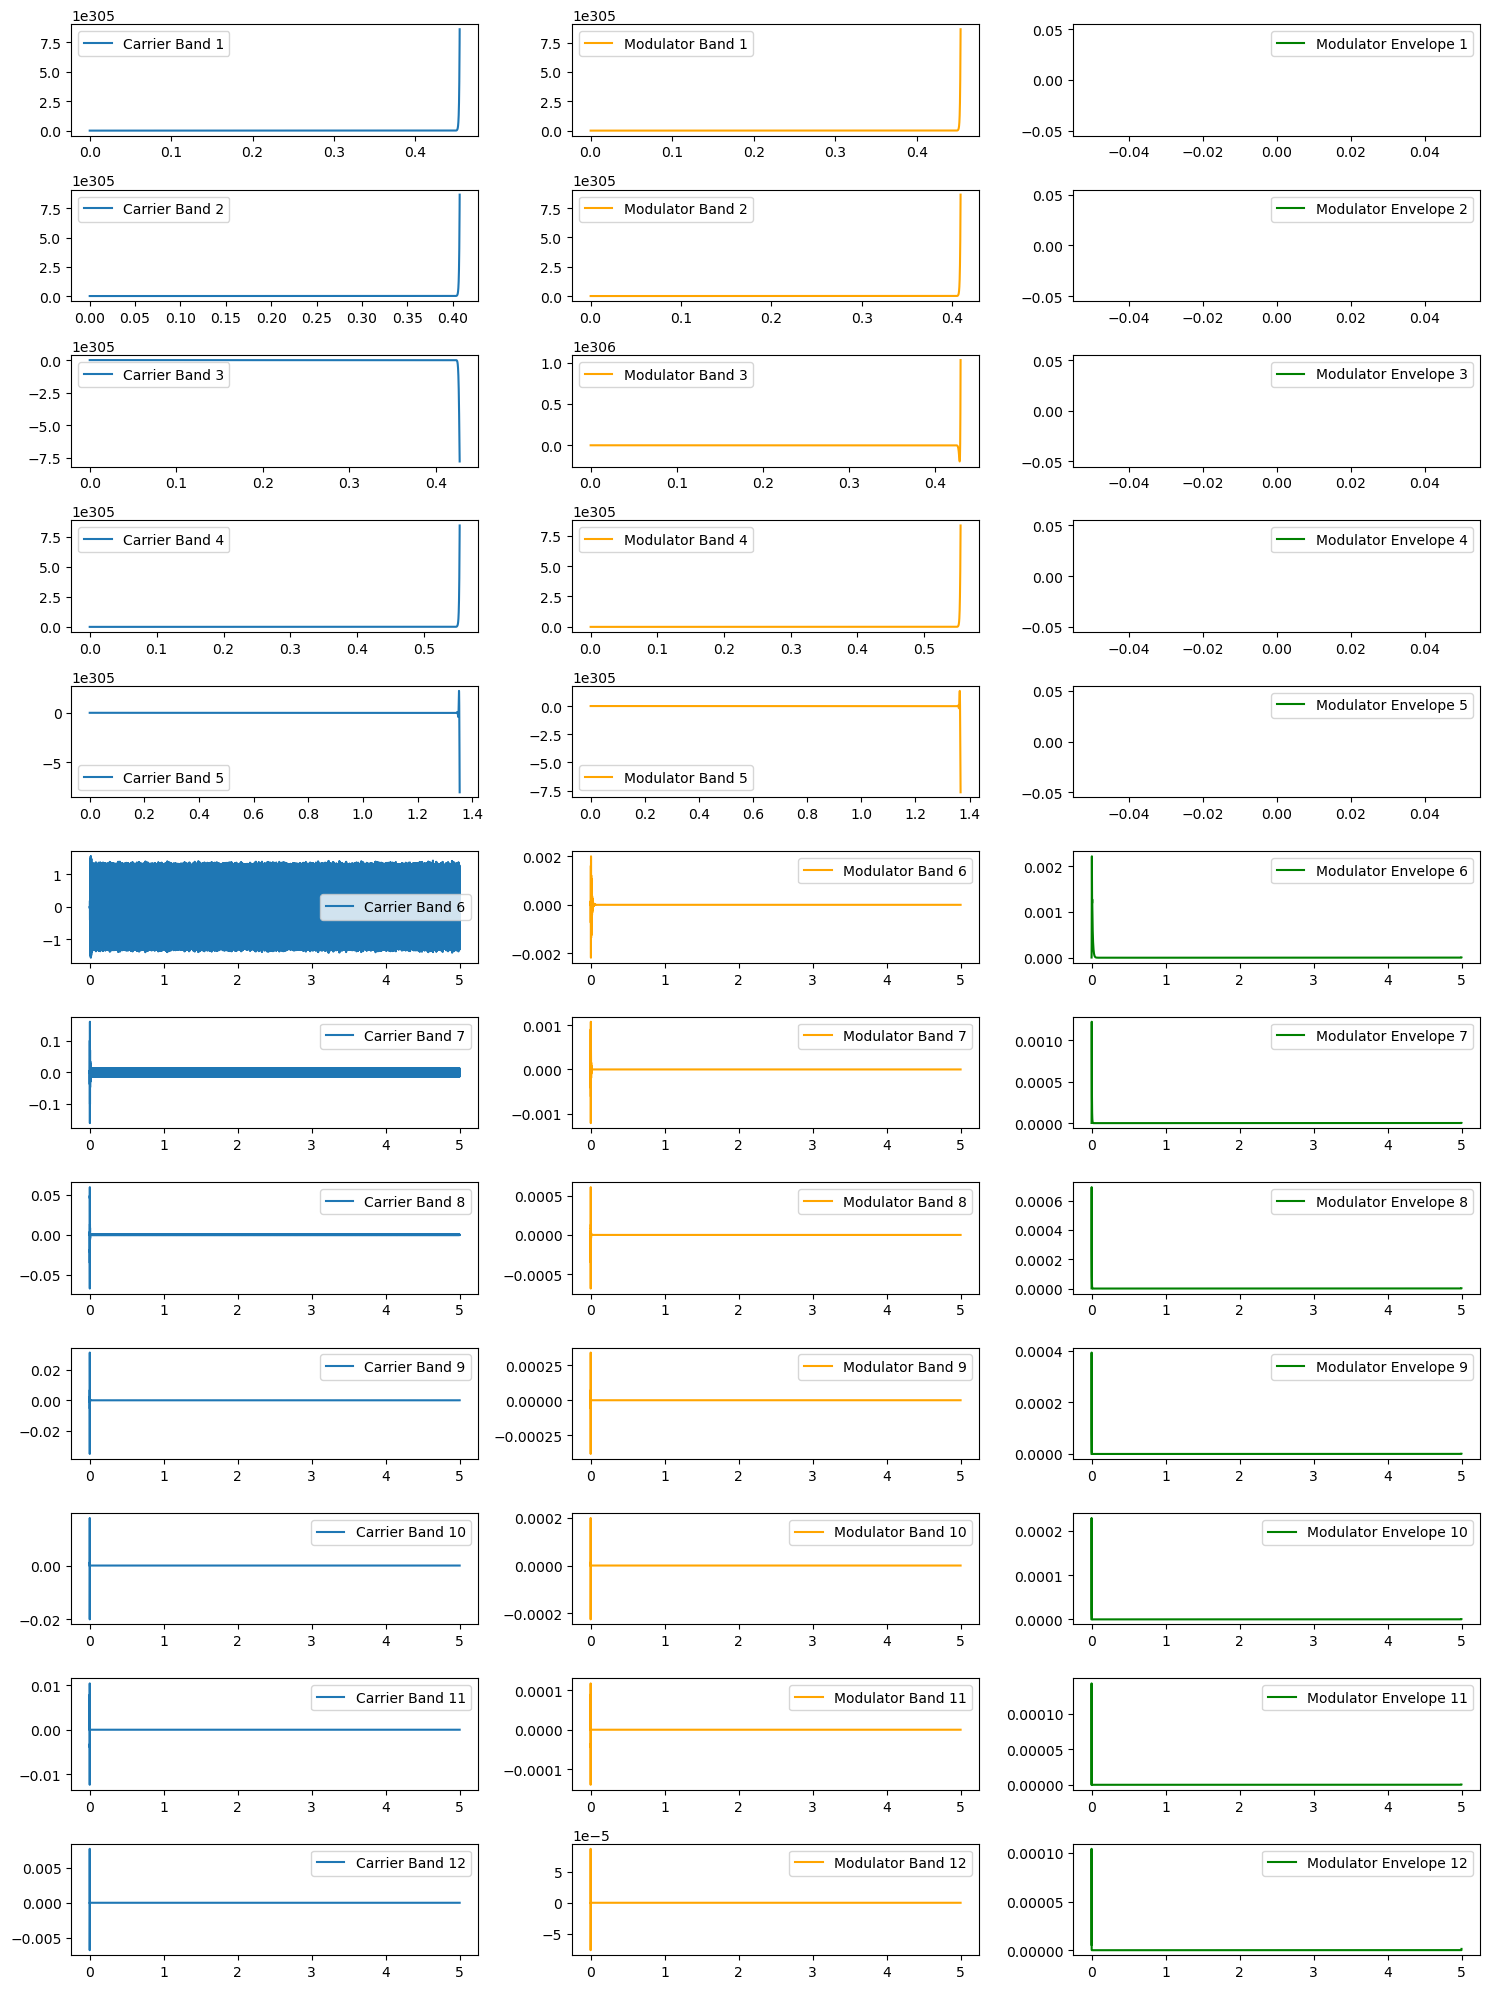

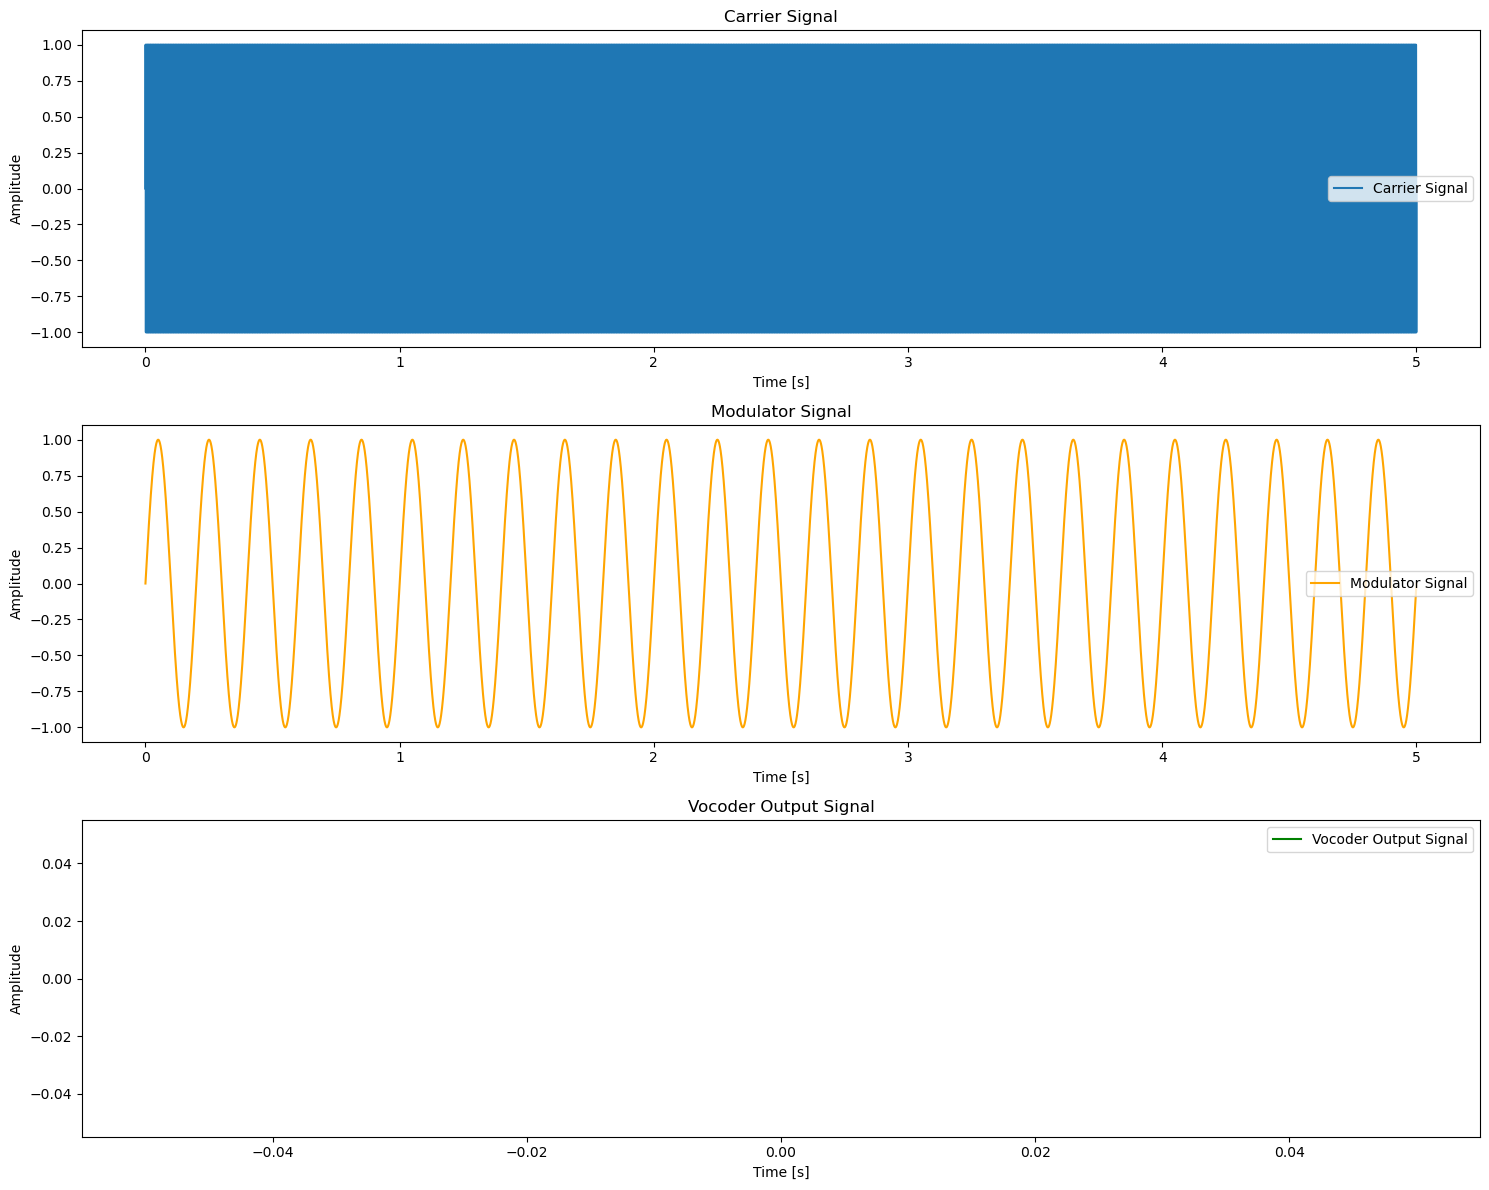

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def envelope(signal):
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    return amplitude_envelope

def vocoder(carrier, modulator, fs, num_bands=12):
    min_freq = 20
    max_freq = 20000
    band_edges = np.logspace(np.log10(min_freq), np.log10(max_freq), num_bands + 1)
    
    output = np.zeros_like(carrier)
    
    for i in range(num_bands):
        lowcut = band_edges[i]
        highcut = band_edges[i + 1]
        
        print(f"Band {i + 1}/{num_bands}: {lowcut:.2f} Hz to {highcut:.2f} Hz")

        carrier_band = bandpass_filter(carrier, lowcut, highcut, fs)
        modulator_band = bandpass_filter(modulator, lowcut, highcut, fs)
        
        modulator_envelope = envelope(modulator_band)
        
        modulated_band = carrier_band * modulator_envelope
        output += modulated_band
    
    return output

fs = 44100  
t = np.linspace(0, 5, fs * 5)
carrier = np.sin(2 * np.pi * 440 * t) 
modulator = np.sin(2 * np.pi * 5 * t)  

vocoder_output = vocoder(carrier, modulator, fs)

def plot_intermediate_results(carrier, modulator, fs, num_bands=12):
    min_freq = 20
    max_freq = 20000
    band_edges = np.logspace(np.log10(min_freq), np.log10(max_freq), num_bands + 1)
    
    plt.figure(figsize=(15, 20))

    for i in range(num_bands):
        lowcut = band_edges[i]
        highcut = band_edges[i + 1]

        carrier_band = bandpass_filter(carrier, lowcut, highcut, fs)
        modulator_band = bandpass_filter(modulator, lowcut, highcut, fs)
        modulator_envelope = envelope(modulator_band)

        plt.subplot(num_bands, 3, 3*i + 1)
        plt.plot(t, carrier_band, label=f"Carrier Band {i+1}")
        plt.legend()
        
        plt.subplot(num_bands, 3, 3*i + 2)
        plt.plot(t, modulator_band, label=f"Modulator Band {i+1}", color='orange')
        plt.legend()

        plt.subplot(num_bands, 3, 3*i + 3)
        plt.plot(t, modulator_envelope, label=f"Modulator Envelope {i+1}", color='green')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_intermediate_results(carrier, modulator, fs)

plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(t, carrier, label="Carrier Signal")
plt.title("Carrier Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, modulator, label="Modulator Signal", color='orange')
plt.title("Modulator Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, vocoder_output, label="Vocoder Output Signal", color='green')
plt.title("Vocoder Output Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code  applies a vocoder effect to an audio signal. It generates a carrier and a modulator signal, processes them through multiple frequency bands, and modulates the carrier with the envelope of the modulator. The script plots the carrier, modulator, and vocoder output signals, as well as intermediate results for each frequency band for visual comparison.

bandpass_filter: Applies a bandpass filter to the input signal.
envelope: Computes the amplitude envelope of the signal using the Hilbert transform.
vocoder: Processes the carrier and modulator signals through multiple frequency bands, applies the modulator's envelope to the carrier's bands, and sums the results.

Define the sampling frequency and create time arrays.
Generate a sine wave at 440 Hz as the carrier signal.
Generate a sine wave at 5 Hz as the modulator signal.

Use the vocoder function to process the carrier and modulator signals.


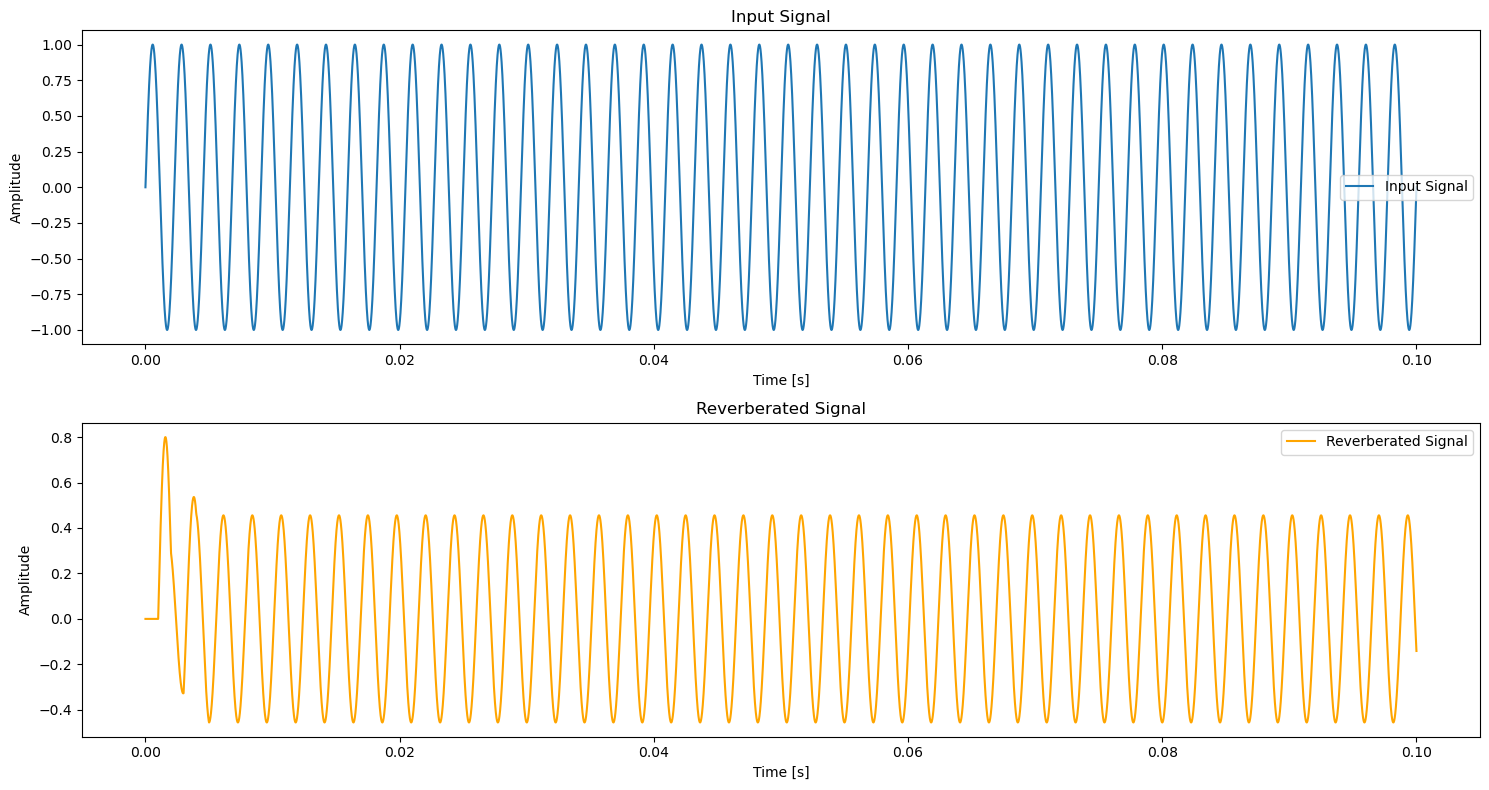

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def delay_signal(signal, delay_samples, gain):
    delayed_signal = np.zeros(len(signal) + delay_samples)
    delayed_signal[delay_samples:] = signal
    return delayed_signal[:len(signal)] * gain

def digital_reverb(signal, fs, delays_ms, gains):
    assert len(delays_ms) == len(gains), "The number of delays and gains must be equal"
    
    delays_samples = [int(delay_ms * fs / 1000) for delay_ms in delays_ms]
    
    reverb_signal = np.zeros_like(signal)
    
    for delay_samples, gain in zip(delays_samples, gains):
        reverb_signal += delay_signal(signal, delay_samples, gain)
    
    return reverb_signal

fs = 44100  
t = np.linspace(0, 0.1, fs * 5)  
input_signal = np.sin(2 * np.pi * 440 * t)  

delays_ms = [50, 100, 150, 200, 250]
gains = [0.8, 0.6, 0.4, 0.2, 0.1]

reverb_signal = digital_reverb(input_signal, fs, delays_ms, gains)

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, reverb_signal, label="Reverberated Signal", color='orange')
plt.title("Reverberated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code  applies a digital reverb effect to an audio signal. It generates a sine wave, applies multiple delays with specified gains to create a reverb effect, and plots both the original and reverberated signals for visual comparison.

delay_signal: Creates a delayed version of the input signal with a specified gain.
digital_reverb: Combines multiple delayed signals with different delays and gains to create a reverb effect.

Use the digital_reverb function to apply the reverb effect to the input signal.

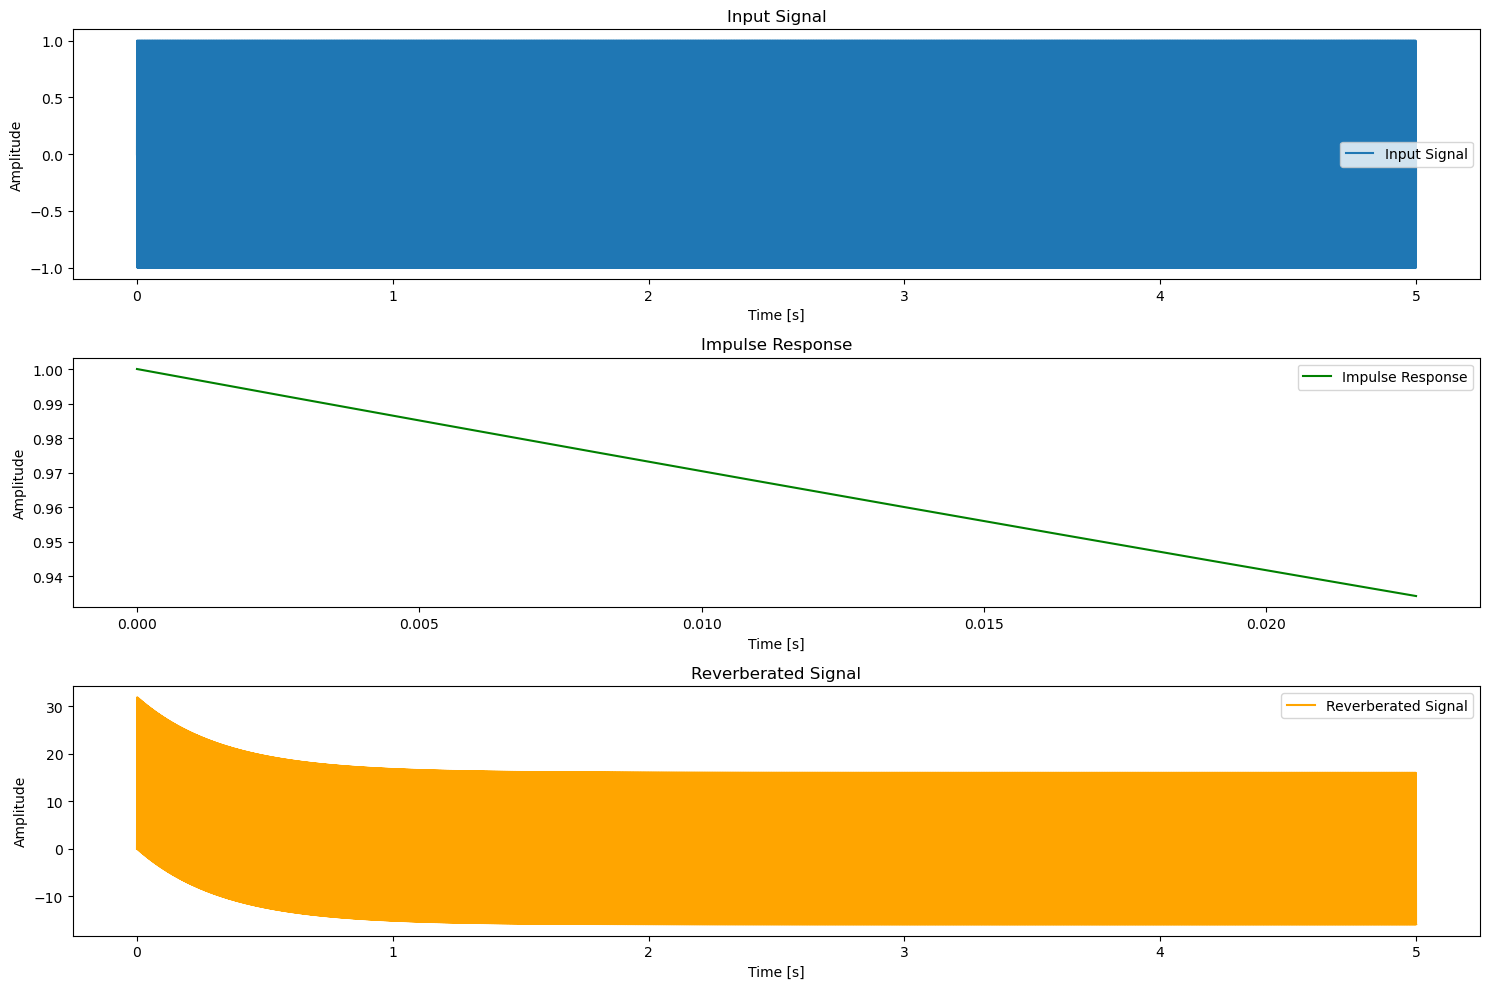

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def convolution_reverb(signal, impulse_response):
    reverb_signal = convolve(signal, impulse_response, mode='full')
    return reverb_signal[:len(signal)]

fs = 44100
t = np.linspace(0, 5, fs * 5)
input_signal = np.sin(2 * np.pi * 440 * t)

impulse_response = np.exp(-t * 3)  
impulse_response = impulse_response / np.max(impulse_response) 

reverb_signal = convolution_reverb(input_signal, impulse_response)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(t, input_signal, label="Input Signal")
plt.title("Input Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[:1000], impulse_response[:1000], label="Impulse Response", color='green')
plt.title("Impulse Response")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, reverb_signal, label="Reverberated Signal", color='orange')
plt.title("Reverberated Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()


This part of the code applies convolution reverb to an audio signal. It generates a sine wave, uses an exponentially decaying impulse response, applies the convolution reverb effect, and plots the original signal, the impulse response, and the reverberated signal for visual comparison.

convolution_reverb: Applies convolution reverb to the input signal using a given impulse response.

Use the convolution_reverb function to apply the reverb effect to the input signal.
